# Proyecto Final: Análisis de Solvencia Financiera

En este proyecto final, tu objetivo es analizar la solvencia financiera de varias empresas para determinar su capacidad de cumplir con sus obligaciones financieras a corto y largo plazo.
Deberás trabajar con un dataset de indicadores financieros, realizar limpieza de datos, construir un dashboard interactivo utilizando Streamlit y, opcionalmente, integrar la API de ChatGPT para ofrecer asistencia conversacional sobre el análisis realizado.

## Objetivos del Proyecto
- Desarrollar habilidades de limpieza y corrección de datos financieros.
- Implementar un dashboard interactivo en Streamlit para visualizar y analizar los datos financieros.
- Aplicar ratios financieros clave para evaluar la solvencia de las empresas.
- (Opcional) Integrar ChatGPT para ofrecer explicaciones y respuestas a preguntas sobre el análisis realizado

## Pasos del Proyecto

### 1. Carga y Limpieza de Datos
Comenzarás trabajando con un dataset de indicadores financieros de diferentes empresas. El dataset contiene columnas como Ingresos Totales, Deudas a Corto Plazo, Deudas a Largo Plazo, Activos Circulantes, Pasivos Circulantes, Patrimonio Neto y Gastos Financieros.
El dataset tiene los siguientes problemas:
- Valores faltantes en algunas columnas.
- Registros duplicados.
- Datos atípicos que podrían sesgar los resultados.
Tu tarea en este paso es:
- Identificar y corregir los valores faltantes (rellenar con la media o mediana, o eliminar
registros).
- Eliminar registros duplicados.

### 1.1. Cargamos el conjunto de datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Cargamos el conjunto de datos que se encuentra en el archivo Datos_proyecto.csv
df = pd.read_csv('Datos_proyecto.csv')

Cambiamos los nombres de las columnas a español:

In [5]:
# Hacemos una copia del dataframe df y la guardamos en el dataframe df_clean cambiando los nombres de la columnas al español

df_clean = df.copy()

# Cambiar nombres de columnas a español
df_clean = df_clean.rename(columns={
    'Company_ID': 'Empresa_ID',
    'Total_Revenue': 'Ingresos_Totales',
    'Short_Term_Debt': 'Deuda_Corto_Plazo',
    'Long_Term_Debt': 'Deuda_Largo_Plazo',
    'Current_Assets': 'Activos_Circulantes',
    'Current_Liabilities': 'Pasivos_Circulantes',
    'Equity': 'Patrimonio_Neto',
    'Financial_Expenses': 'Gastos_Financieros',
    'Current_Ratio': 'Ratio_Actual',
    'Debt_to_Equity_Ratio': 'Ratio_Deuda_Patrimonio',
    'Interest_Coverage_Ratio': 'Ratio_Cobertura_Intereses',
    'Industry': 'Industria',
    'Country': 'Pais',
    'Company_Size': 'Tamano_Empresa'
})


#### 1.2. Identificación del tamaño del dataset
#### 1.2.1 Tamaño del dataset
¿Cuántos registros y columnas tiene el dataset?


In [ ]:
df_clean.shape # El tamaño del dataset es de 105 filas y 14 columnas

(105, 14)

#### 1.1.2 Tipo de datos
¿Qué tipos de datos contiene cada columna?

In [ ]:
# Tipos de datos que contiene cada columna
df_clean.dtypes

,0
Empresa_ID,object
Ingresos_Totales,float64
Deuda_Corto_Plazo,float64
Deuda_Largo_Plazo,float64
Activos_Circulantes,float64
Pasivos_Circulantes,float64
Patrimonio_Neto,float64
Gastos_Financieros,float64
Ratio_Actual,float64
Ratio_Deuda_Patrimonio,float64


#### 1.3. Valores faltantes
Pregunta: ¿Cuántos registros tienen datos faltantes?

In [ ]:
df_clean.isnull().sum() # Nos regresa la cantidad de valores nulos por columna

,0
Empresa_ID,0
Ingresos_Totales,3
Deuda_Corto_Plazo,3
Deuda_Largo_Plazo,0
Activos_Circulantes,0
Pasivos_Circulantes,0
Patrimonio_Neto,0
Gastos_Financieros,4
Ratio_Actual,0
Ratio_Deuda_Patrimonio,0


#### 1.4. Duplicados
¿Cuántos registros están marcados como duplicados?



In [ ]:
# Valores duplicados de la columna Empresa_ID
duplicate_empresas = df_clean[df_clean.duplicated(subset=['Empresa_ID'], keep=False)]['Empresa_ID']
print(duplicate_empresas)

5      C0006
21     C0022
23     C0024
35     C0036
91     C0092
100    C0092
101    C0036
102    C0006
103    C0022
104    C0024
Name: Empresa_ID, dtype: object


#### 1.5. Visualización
Visualización para identificar outliers

Aquí lo hacemos con el dataframe original, posteriormente volveremos a graficar los boxplot para ver los cambios cuando limpiemos nuestro conjunto de datos

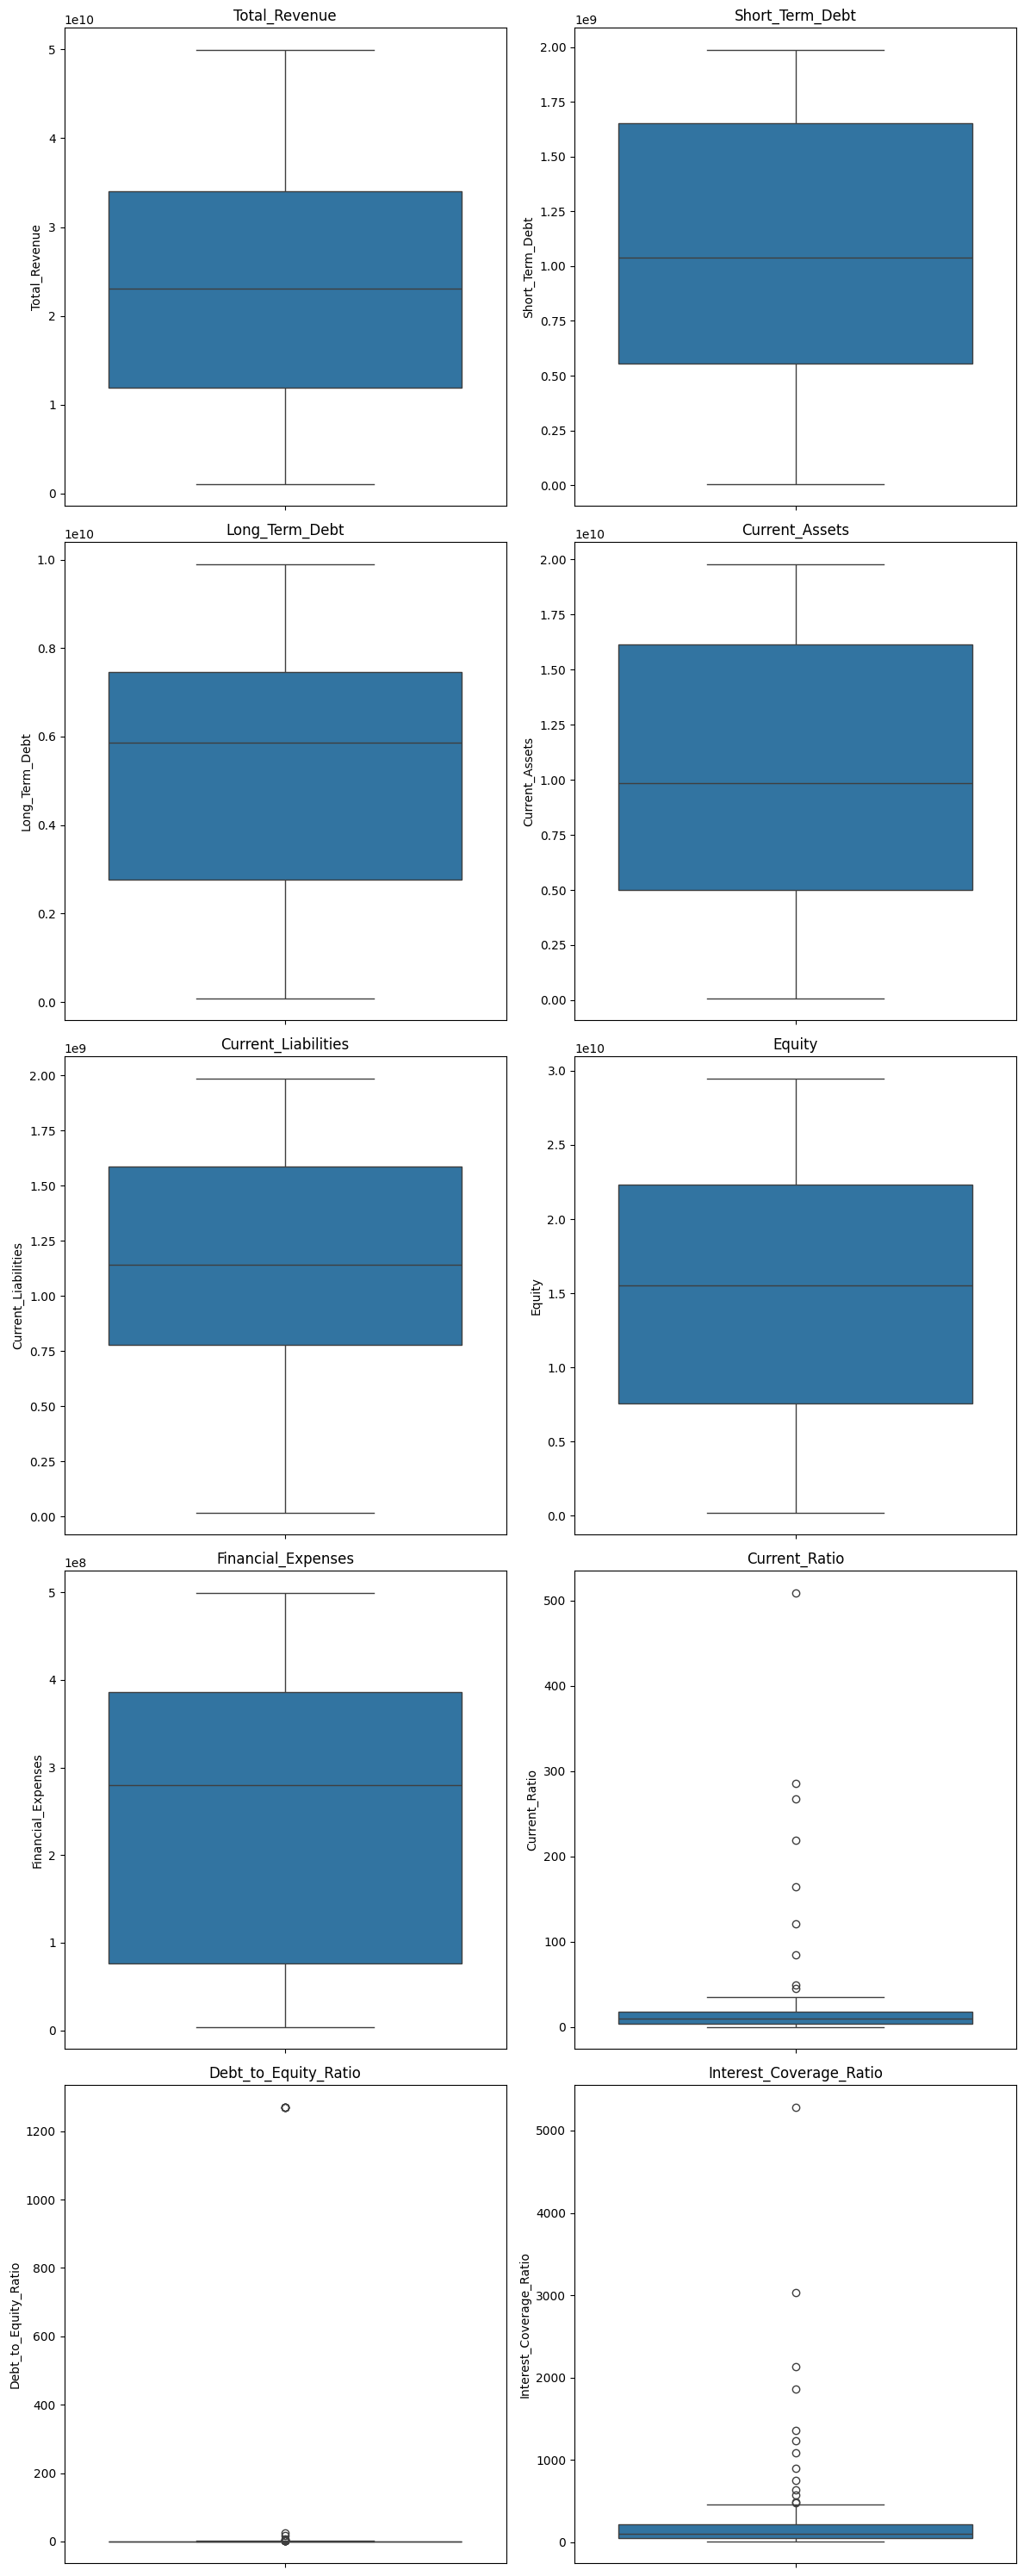

In [ ]:
# Obtener las columnas numéricas del DataFrame
numerical_cols = df.select_dtypes(include=np.number).columns

# Calculamos el número de filas y columnas para subparcelas
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2  # Calculamos las filas, para asegurarnos de dejar suficiente espacio
num_cols = min(num_cols, 2)  # Limitado a dos columnas

# Crear una figura con subplots para cada columna numérica
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows), layout='constrained')

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Iterar sobre las columnas numéricas y generar un boxplot para cada una
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i]) # usamos seaborn para crear los boxplot
    axes[i].set_title(col)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

### 2. Limpieza y manipulación de datos
Aquí nos enfocamos en eliminar duplicados, imputar datos faltantes.

Dado que, posteriormente se nos solicita calcular los siguientes ratios financieros para analizar la solvencia de las empresas: Ratio de Liquidez (Activos Circulantes / Pasivos Circulantes), Ratio de Deuda a Patrimonio (Deuda Total / Patrimonio Neto), Cobertura de Gastos Financieros (Ingresos Totales / Gastos Financieros), podemos rellenar los datos faltantes de { 'Ingresos_Totales' : 3 }, { 'Deuda_Corto_Plazo' : 3 } y { 'Gastos_Financieros' : 4 } utilizando la media.

#### 2.1. Imputación de datos faltantes
Pregunta: ¿Cómo imputarías los valores faltantes en las columnas `Ingresos_Totales`, `Deuda_Corto_Plazo` y `Gastos_Financieros`?

In [ ]:
# Inputar los valores faltantes de cada columna con la media

# Rellenar los valores faltantes de Ingresos_Totales con la media
df_clean['Ingresos_Totales'].fillna(df_clean['Ingresos_Totales'].mean(), inplace=True)

# Rellenar los valores faltantes de Short_Term_Debt con la media
df_clean['Deuda_Corto_Plazo'].fillna(df_clean['Deuda_Corto_Plazo'].mean(), inplace=True)

# Rellenar los valores faltantes de Financial_Expenses con la media
df_clean['Gastos_Financieros'].fillna(df_clean['Gastos_Financieros'].mean(), inplace=True)


# Comprobamos que ya no haya datos faltantes
df_clean.isnull().sum()

,0
Empresa_ID,0
Ingresos_Totales,0
Deuda_Corto_Plazo,0
Deuda_Largo_Plazo,0
Activos_Circulantes,0
Pasivos_Circulantes,0
Patrimonio_Neto,0
Gastos_Financieros,0
Ratio_Actual,0
Ratio_Deuda_Patrimonio,0


#### 2.2. Eliminación de duplicados
¿Cómo eliminarías duplicados del dataset?

In [ ]:
# Eliminar registros duplicados basados en la columna 'Empresa_ID'
df_clean = df_clean.drop_duplicates(subset=['Empresa_ID'], keep='first')
df_clean.shape

(100, 14)

#### 2.2. Eliminación de outliers
¿Cómo eliminarías outliers del dataset?

In [ ]:
# Como los ratios financieros que se nos pide calcular ya están integrados desde un inicio en el dataframe, he decidido eliminar dichas columnas y realizar las operaciones correspondientes
df_clean.drop(['Ratio_Actual', 'Ratio_Deuda_Patrimonio', 'Ratio_Cobertura_Intereses'], axis=1, inplace=True, errors='ignore')

# Calculamos y nombramos las columnas de los ratios que se nos piden en el archivo de instrucciones
df_clean['Ratio_de_Liquidez'] = df_clean['Activos_Circulantes'] / df_clean['Pasivos_Circulantes']
df_clean['Ratio_Deuda_a_Patrimonio'] = (df_clean['Deuda_Corto_Plazo'] + df_clean['Deuda_Largo_Plazo']) / df_clean['Patrimonio_Neto']
df_clean['Cobertura_Gastos_Financieros'] = df_clean['Ingresos_Totales'] / df_clean['Gastos_Financieros']


In [ ]:
# De las columnas Ratio_de_Liquidez, Ratio_Deuda_a_Patrimonio, Cobertura_Gastos_Financieros dime la cantidad de valores que sobrepasan el Rango Intecuantil, elimina las filas de los que sobrepasen el rango intercuantil de las columnas mencionadas

for column in ['Ratio_de_Liquidez', 'Ratio_Deuda_a_Patrimonio', 'Cobertura_Gastos_Financieros']:
  Q1 = df_clean[column].quantile(0.25)
  Q3 = df_clean[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers_count = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)].shape[0]
  print(f"La columna '{column}' tiene {outliers_count} valores que sobrepasan el rango intercuantil.")

  df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]



La columna 'Ratio_de_Liquidez' tiene 9 valores que sobrepasan el rango intercuantil.
La columna 'Ratio_Deuda_a_Patrimonio' tiene 11 valores que sobrepasan el rango intercuantil.
La columna 'Cobertura_Gastos_Financieros' tiene 12 valores que sobrepasan el rango intercuantil.


#### 2.3. Visualización del dataframe df_clean

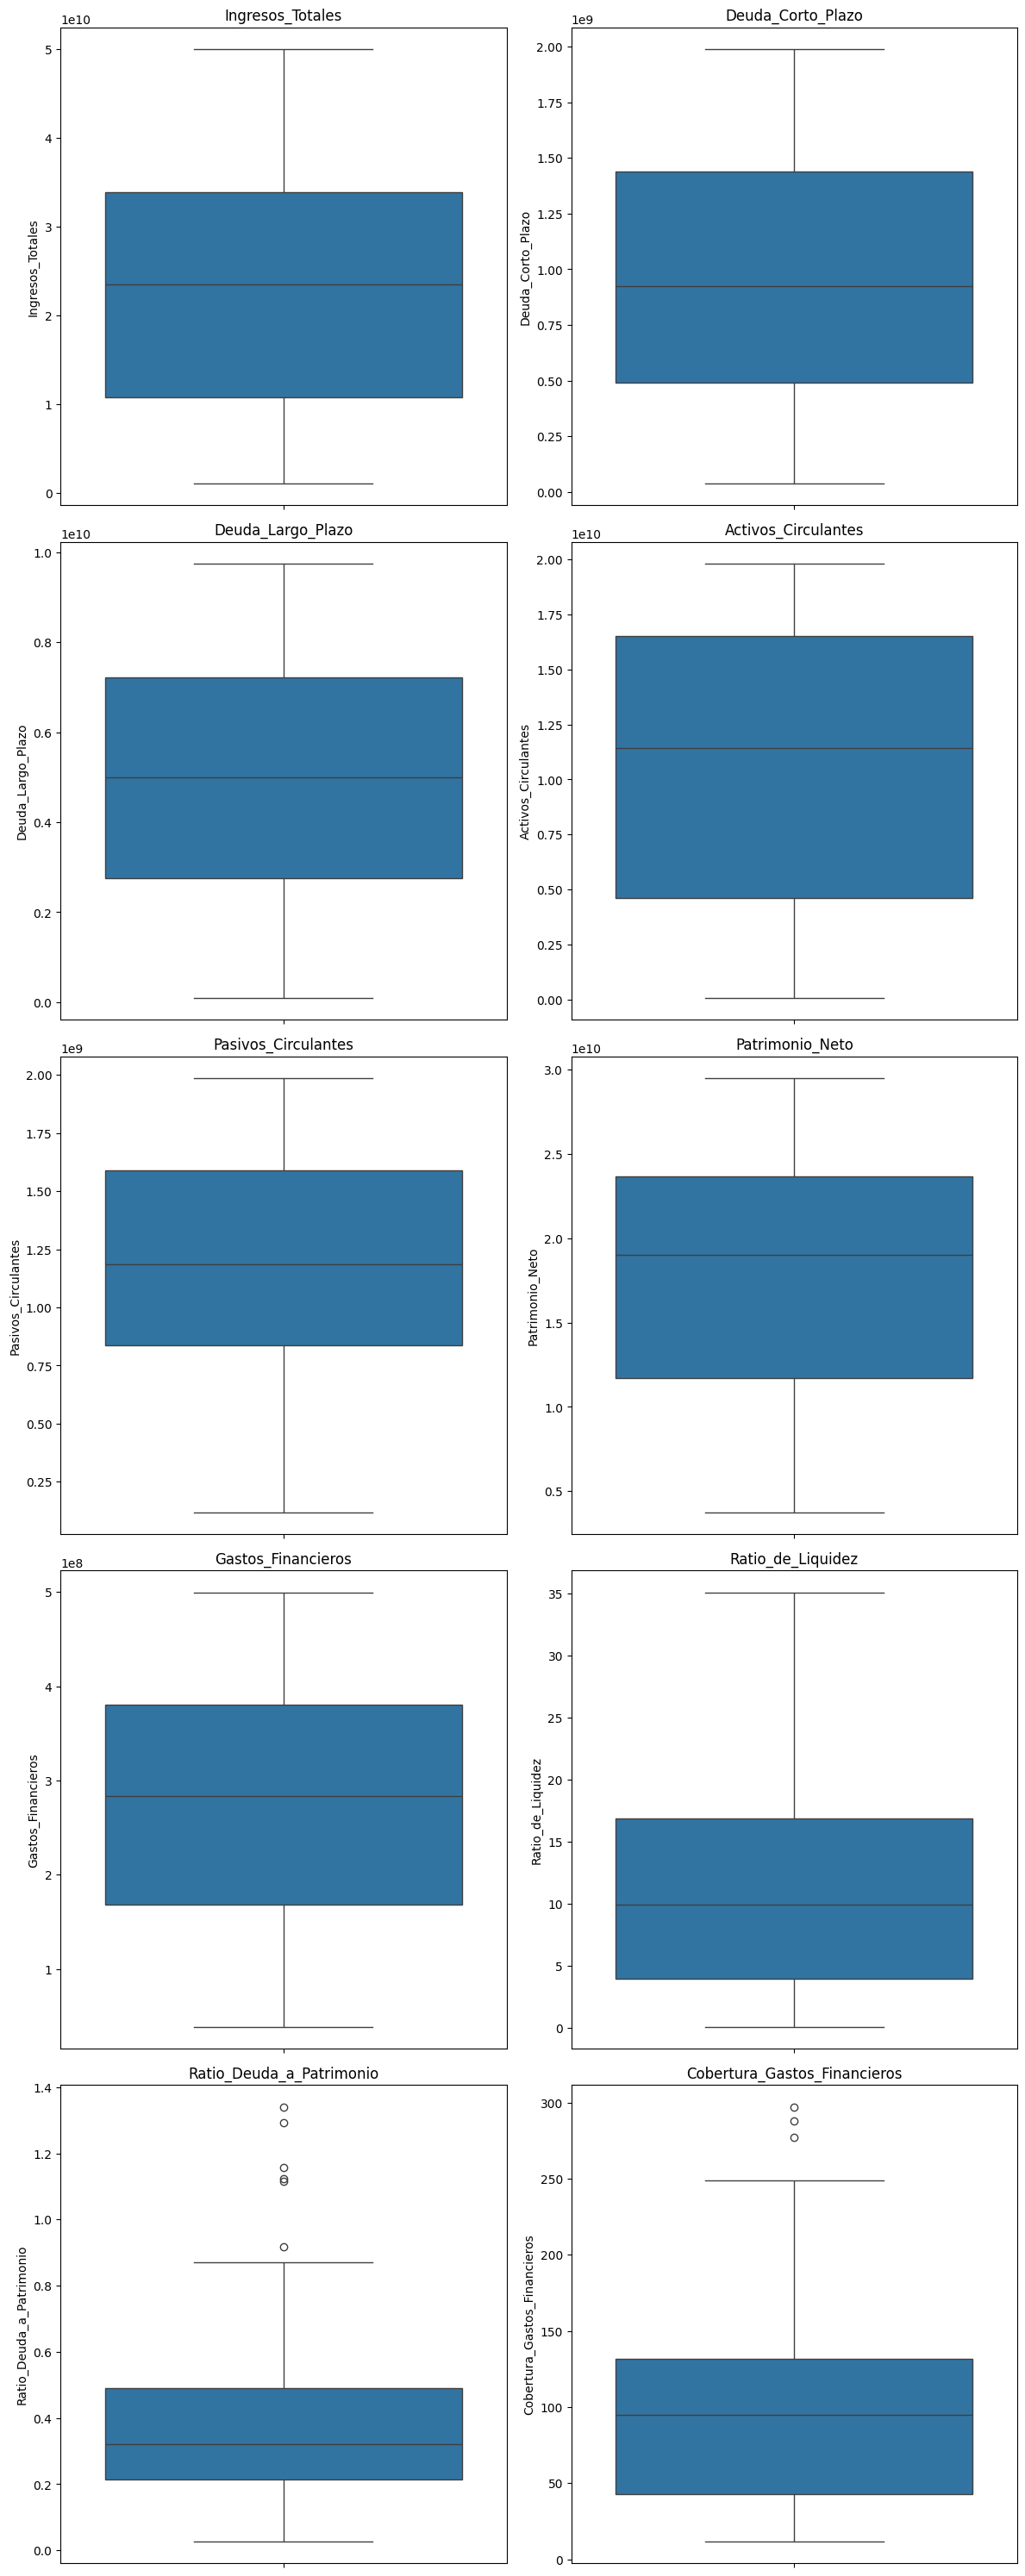

In [ ]:
# Obtener las columnas numéricas del DataFrame
numerical_cols = df_clean.select_dtypes(include=np.number).columns

# Calculamos el número de filas y columnas para subparcelas
num_cols = len(numerical_cols)
num_rows = (num_cols + 1) // 2  # Calculamos las filas, para asegurarnos de dejar suficiente espacio
num_cols = min(num_cols, 2)  # Limit columns to 2

# Crear una figura con subplots para cada columna numérica
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 6 * num_rows), layout='constrained')

# Aplanar los ejes para facilitar el acceso
axes = axes.flatten()

# Iterar sobre las columnas numéricas y generar un boxplot para cada una
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_clean[col], ax=axes[i]) # using seaborn to create boxplot
    axes[i].set_title(col)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

#### 2.4. Porcentaje de valores eliminados
Calculamos el numero de filas eliminadas así como el porcentaje que representa

In [ ]:
# Ahora vemos la cantidad/porcentaje de registros/filas eliminadas de df y df_clean

rows_df = df.shape[0]
rows_df_clean = df_clean.shape[0]

rows_deleted = rows_df - rows_df_clean
percentage_deleted = (rows_deleted / rows_df) * 100

print(f"Se eliminaron {rows_deleted} filas, que representan el {percentage_deleted:.2f}% del DataFrame original.")


Se eliminaron 37 filas, que representan el 35.24% del DataFrame original.


#### 3 Exportación del dataframe a un archivo CSV

In [ ]:
# Guardamos nuestro dataframe limpio a un archivo llamado datos_limpios
df_clean.to_csv('datos_limpios.csv', index=False)